In [1]:
import numpy as np

In [2]:
ls

negative_position_cube.csv  positive_position_cube.csv  Untitled.ipynb


In [11]:
neg = np.loadtxt('negative_position_cube.csv', delimiter=',', dtype=np.int8)[:, 1:]
pos = np.loadtxt('positive_position_cube.csv', delimiter=',', dtype=np.int8)[:, 1:]

In [117]:
pos_cube = np.zeros([8,8,8], dtype=np.int16)
neg_cube = np.zeros([8,8,8], dtype=np.int16)

In [118]:
for i in range(neg.shape[0]):
    pz,py,px = pos[i]
    pos_cube[pz,py,px]+=1
    nz,ny,nx = neg[i]
    neg_cube[nz,ny,nx]+=1

In [119]:
tot_cube = pos_cube + neg_cube

In [120]:
prob_pos = pos_cube/(tot_cube+1e-30)
prob_neg = neg_cube/(tot_cube+1e-30)

In [134]:
density = tot_cube/tot_cube.sum()

In [136]:
(density*np.max(np.stack([prob_pos,prob_neg]),axis=0)).sum()

0.7963632961137794

In [129]:
import matplotlib.pyplot as plt

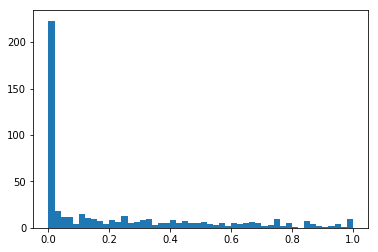

In [132]:
plt.hist(prob_pos.flatten(),bins=50);

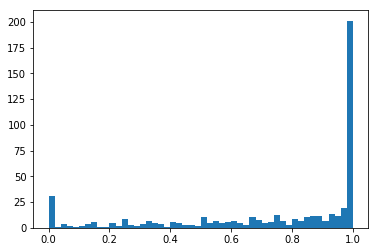

In [133]:
plt.hist(prob_neg.flatten(),bins=50);

In [143]:
np.save('weighted_loss.npy',(tot_cube/tot_cube.max()).flatten())

In [144]:
np.save('prior_pos.npy', prob_pos)